In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.layers import Conv2D

1/1 [==============================] - 0s 74ms/step


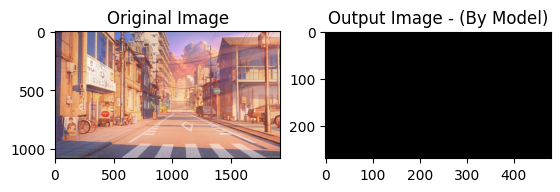

In [199]:
image_path = '/content/wp5138904-anime-aesthetic-street-wallpapers.jpg'
image = tf.keras.preprocessing.image.load_img(image_path)
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(None, None, 3), strides=2),
    tf.keras.layers.MaxPooling2D()
])

output_image = model.predict(image_array)

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(tf.keras.preprocessing.image.array_to_img(image_array[0]))

plt.subplot(1, 2, 2)
plt.title('Output Image - (By Model)')
plt.imshow(output_image[0, :, :, 0], cmap='gray')

plt.show()


In [201]:
output_image.shape

(1, 269, 479, 16)

[[-2 -2  0]
 [-2  0  2]
 [ 0  2  2]]
541
961


100%|██████████| 539/539 [00:03<00:00, 154.56it/s]


541
961


100%|██████████| 539/539 [00:04<00:00, 132.66it/s]


541
961


100%|██████████| 270/270 [00:00<00:00, 572.45it/s]


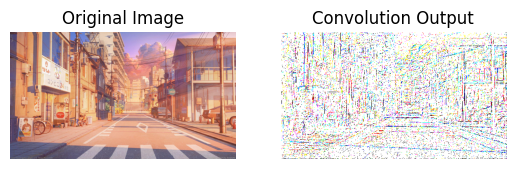

In [197]:
import numpy as np
import matplotlib.pyplot as plt

def conv2d(input_data, kernel, stride=2, padding=2):
    input_height, input_width = input_data.shape
    kernel_height, kernel_width = kernel.shape

    output_height = ((input_height - kernel_height + 2 * padding)//stride + 1)
    print(output_height)
    output_width = ((input_width - kernel_width + 2 *  padding)//stride + 1)
    print(output_width)

    output_map = np.zeros((output_height, output_width))

    padded_input = np.pad(input_data, ((padding, padding), (padding, padding)), mode='constant')

    for i in tqdm(range(0, input_height - kernel_height+1, stride)):
        for j in range(0, input_width - kernel_width + 1, stride):
            input_region = padded_input[i:i+kernel_height, j:j+kernel_width]
            output_map[i//stride, j//stride] = np.sum(input_region * kernel) + 0.5

    output_map[output_map < 0] = 0

    return output_map

def maxpool2d(input_matrix, kernel_size=2, stride=2):
    input_height, input_width = input_matrix.shape
    output_height = (input_height - kernel_size) // stride + 1
    output_width = (input_width - kernel_size) // stride + 1

    output_matrix = np.zeros((output_height, output_width))

    for i in tqdm(range(0, input_height - kernel_size + 1, stride)):
        for j in range(0, input_width - kernel_size + 1, stride):
            submatrix = input_matrix[i:i+kernel_size, j:j+kernel_size]
            output_matrix[i//stride, j//stride] = np.max(submatrix)

    return output_matrix

image_path = '/content/wp5138904-anime-aesthetic-street-wallpapers.jpg'

layer_1 = plt.imread(image_path)[:, :, 0]
layer_2 = plt.imread(image_path)[:, :, 1]
layer_3 = plt.imread(image_path)[:, :, 2]

kernel_horizon = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])

kernel_verti = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]])

# combine two kernel
kernel = kernel_horizon + kernel_verti
# kernel2 = np.random.randint(-2,2, size=(2,2))
print(kernel)

conv_output1 = np.round(conv2d(layer_1, kernel))
conv_output2 = np.round(conv2d(layer_2, kernel))
conv_output3 = np.round(conv2d(layer_3, kernel))

final_op1 = maxpool2d(conv_output1)
final_op2 = maxpool2d(conv_output2)
final_op3 = maxpool2d(conv_output3)

input_layer = np.stack([final_op1, final_op2, final_op3], axis=-1)

# Visualize the original image and the output of the convolution
plt.subplot(1, 2, 1)
image = plt.imread(image_path)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(input_layer, cmap='gray')
plt.title('Convolution Output')
plt.axis('off')

plt.show()

(1080, 1920, 3)


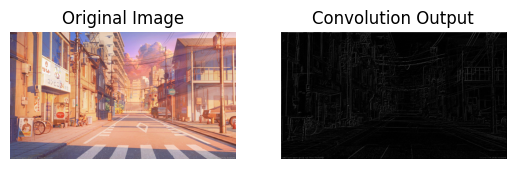

In [198]:
plt.subplot(1, 2, 1)
image = plt.imread(image_path)
print(image.shape)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(conv_output1, cmap='gray')
plt.title('Convolution Output')
plt.axis('off')

plt.show()

In [182]:
conv_output1

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 2., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 1.]])

In [ ]:
[[ 2,  1,  1,  1, -2,  2,  1,  0, -2],
 [ 2,  2, -2,  1,  1,  1,  2, -1, -2],
 [ 2,  0,  0, -1,  0, -2, -2,  2,  1],
 [-1,  0, -2,  2,  0, -2,  1,  1,  0],
 [-1, -2,  1,  1,  1,  0,  1, -1, -1],
 [-1, -1, -1,  0,  0,  0, -2,  0, -2],
 [-2,  2,  0, -2,  1,  0,  0,  0,  2],
 [ 2, -1, -1,  2, -2,  0,  0, -2,  1],
 [ 0, -2, -2,  2,  2,  2, -2, -1,  0]]

In [ ]:
[[ 2,  1, -2,  2, -1, -1, -2, -2, -1],
 [ 0, -1, -1,  1, -2, -2, -2, -2,  0],
 [ 2,  2,  2,  1,  1, -1,  2,  2, -2],
 [ 1,  2,  2, -2, -1,  2,  1, -2,  2],
 [ 2,  2,  1, -1, -1, -1,  0, -2, -2],
 [-2, -1, -2, -1,  2,  2,  0,  2, -2],
 [-2,  0,  1, -1,  2,  1,  1,  0,  1],
 [-2,  2,  0, -2,  2, -1,  0,  1,  2],
 [ 2,  2,  0, -1,  1,  1,  1, -2, -2]]

array([[  25.5,    0. , -144.5, ..., -597.5,    0. , -601.5],
       [ 190.5,    0. ,  -39.5, ..., -182.5,    0. , -201.5],
       [ 169.5,    0. ,  -61.5, ..., -193.5,    0. , -209.5],
       ...,
       [ 200.5,    0. ,  -55.5, ..., -106.5,    0. ,   43.5],
       [ 204.5,    0. ,  -66.5, ..., -314.5,    0. , -118.5],
       [ 180.5,    0. ,  -43.5, ...,  -67.5,    0. , -105.5]])

0.3411764705882353

In [133]:
a = np.array([[4,0],[3,2]])
b = np.array([[-2,0],[1,2]])
np.sum(a*b) + (-1)

-2

0

0
2
4
6
8
10
12
14
16
18
